**Based on Notebook from Aurelien Geron**

**Hands-on ML with Scikit-Learn & Tensorflow**

**Chapter 6 – Decision Trees**


## 0.  Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


## 1. Visualizing Data

(150, 2)
(150,)


Text(0, 0.5, 'Petal width')

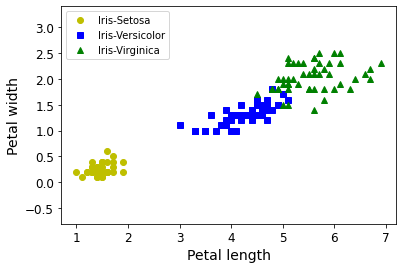

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
print(X.shape)
print(y.shape)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
plt.axis('equal')
plt.legend()
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

## 2. Classification Decision Tree
### 2.1 Training

we Run the following blocks to train a decision train

**Questions:** 
- How is the training actually done?
In the trainig, we have to find the best candidate in terms of a quality measure of the nodes.
To calculate this quality, we use Entripy, Gini index and Information gain etc.
1: At first, we execute Random Node Optimizations. we generate several split candidates of nodes randomly and serach the best candidate that can maximize the quality measure of the candidate.

2: After finding the best candidate, we can split the data into the hierachical tree. 
we use split function to determin the split into left node or right node of each parent node.

3: Once we satisfy the one of the following conditions, we stop the training. 

*we reach the maximum depth of the tree 
*we get the indicated minimum number of data points in the current node.
*Quality measure calculation stops beacause of its limit.


- What do the different parameters stand for?






In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf = tree_clf.fit(X, y)
#from sklearn import tree
#tree.export_graphviz(clf)



'digraph Tree {\nnode [shape=box] ;\n0 [label="X[0] <= 2.45\\ngini = 0.667\\nsamples = 150\\nvalue = [50, 50, 50]"] ;\n1 [label="gini = 0.0\\nsamples = 50\\nvalue = [50, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[1] <= 1.75\\ngini = 0.5\\nsamples = 100\\nvalue = [0, 50, 50]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="gini = 0.168\\nsamples = 54\\nvalue = [0, 49, 5]"] ;\n2 -> 3 ;\n4 [label="gini = 0.043\\nsamples = 46\\nvalue = [0, 1, 45]"] ;\n2 -> 4 ;\n}'

Save a visualization of the tree in file iris_tree.dot
Visualize it online for instance copying the text inside the saved file into https://dreampuf.github.io/GraphvizOnline/

In [9]:
export_graphviz(
        tree_clf,
        out_file="./iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

/Users/saitouyuuki/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


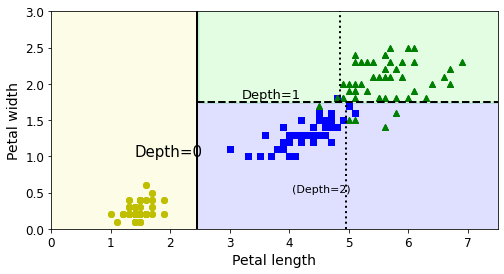

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):

    # Take a dense grid of points 100 x 100
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    # Make a prediction for every point on the grid
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    # Define colors for the three classes
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

    # Draw prediction surfaces
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)

    # Define colors and draw prediction surfaces for other datasets
    if not iris: 
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    # plot training points 
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)

    # name axis
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

#Manually draw the decision lines, the values were taken from the saved tree
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

### 2.2. Predicting classes and class probabilities

**Questions**: 
How is the prediction done? Explain the results in the following lines

In [11]:
print(tree_clf.predict_proba([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]


In [12]:
print(tree_clf.predict([[5, 1.5]]))


[1]


### 2.3 Two moons dataset 
Try different values of depth and min_samples_leaf

/Users/saitouyuuki/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
/Users/saitouyuuki/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


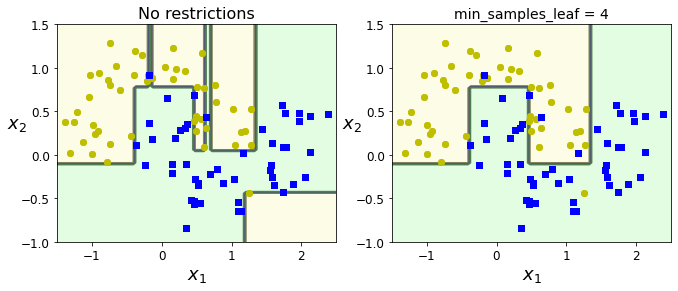

In [13]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

## 3. Regression Decision Tree

Creates two trees with different depths. 

**Question** what are the main differences in the predictions

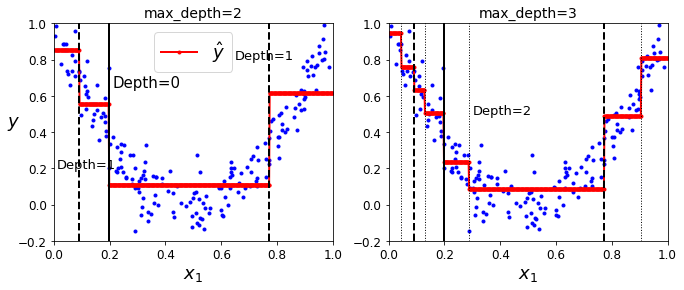

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Creating a quadratic training set + noise
rnd.seed(42)
m = 200
X = rnd.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + rnd.randn(m, 1) / 10

# Create two trees with different depths
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# Create function to plot predictions for regression
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    #create points where to evaluate the predictions of the trained trees
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    
    #make predictions
    y_pred = tree_reg.predict(x1)
    
    #create axis
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)

    #Plot provided training points X,y as blue points
    plt.plot(X, y, "b.")
    
    #Plot predictions for the linspace
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

# Create figure 
plt.figure(figsize=(11, 4))

# Plot the predictiosn for the first tree
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)

# Annotate the plot with text
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

# Plot the predictions for the second tree
plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)

# Annotate the plot with text
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

In [36]:
export_graphviz(
        tree_reg1,
        out_file="./regression_tree.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

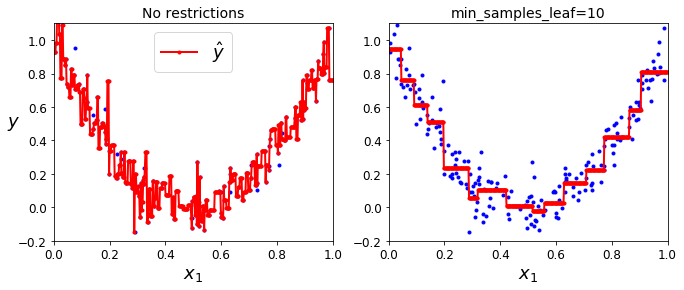

In [34]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()